## Artificial Neural Network

Situation: I want to predict the score on a test based on how many hours you sleep and how many hours you study the night before. Let’s say for the last three tests, you recorded your number of hours of studying, your number of hours sleeping, and your score on the test. I will use Python to store the data in 2-dimensional numpy arrays.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float) # X = (hours sleeping, hours studying)
y = np.array(([75], [82], [93]), dtype=float) # y = Score on test

In [3]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [4]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [5]:
# Normalize the data
X = X/np.amax(X, axis=0)
y = y/100 

In [6]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [7]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

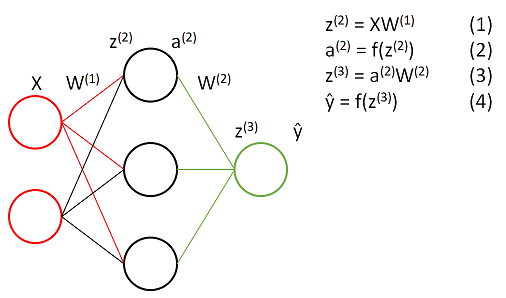

In [8]:
from IPython.display import Image
i = Image(filename='/Users/Sony/Desktop/Python/Artificial Neural Network/simpleNetwork.png')
i

Our network has 2 inputs, 3 hidden units, and 1 output.

In [9]:
print X.shape, y.shape # Show the dimension of X and y

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-9-eb8f84242830>, line 1)

In [10]:
class Neural_Network(object):
    def __init__(self): # Define Hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1

We are using a sigmoid as our activation function.

$$a^{(2)}=f(z^{(2)}) = 1/(1+e^{-z^{(2)}})$$

$$\hat{y} = f(z^{(3)}) = 1/(1+e^{-z^{(3)}})$$

In [11]:
# Apply sigmoid activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

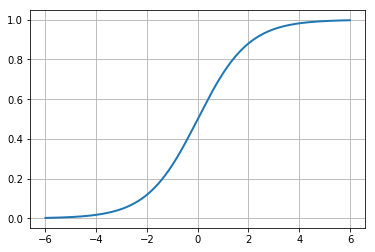

In [12]:
# Test the function
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth= 2)
grid(1)

Use f to denote our activation function.

$$a^{(2)}=f(z^{(2)}) = 1/(1+e^{-z^{(2)}})$$

W2 will be of size 3 by 1, one weight for each synapse. Multiplying a2 by W2, results in a 3 by 1 matrix z three, the activity of our third layer.

$$z^{(3)} = a^{(2)}*W^{(2)}$$

Last but not least, we'll apply our activation function to z three yielding our official estimate of your test score, yHat.

$$\hat{y} = f(z^{(3)}) = 1/(1+e^{-z^{(3)}})$$

In [13]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize) # Assign random number for W1
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize) # Assign random number for W2
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

First we will initialize our weight matrices in our init method. For starting values, we will use random numbers. We will implement forward propagation, using numpy's built in dot method for matrix multiplication and our own sigmoid method.

In [14]:
NN = Neural_Network()

In [15]:
yHat = NN.forward(X)

In [16]:
yHat

array([[ 0.55150922],
       [ 0.59787183],
       [ 0.61531173]])

In [17]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

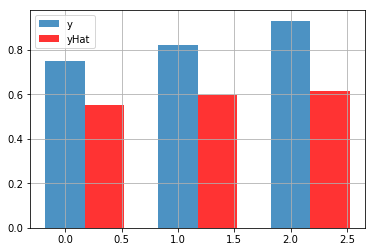

In [18]:
#Compare estimate, yHat, to actually score
bar([0,1,2], y, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yHat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'yHat'])

You may notice that our estimates are quite terrible. That's because we have not yet trained our network.

To improve our model, we first need to quantify exactly how wrong our predictions are. We'll do this with a cost function. A cost function allows us to express exactly how wrong or "costly" our models is, given our examples.

One way to compute an overall cost is to take each error value, square it, and add these values together. Multiplying by one half will make things simpler down the road. Now that we have a cost, or job is to minimize it.

$$J = \sum \frac{1}{2}(y-\hat{y})^2$$

We will minimize our cost by changing the weights.

We have a collection of 9 individual weights, and there are some combinations of w's that will make our cost, J, as small as possible.

Let's pretend for a second that we only have 1 weight, instead of 9. To find the ideal value of our weight that will minimize our cost, we need to try a bunch of values for W, let's say we test 1000 values.

In [19]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

In [20]:
timeElapsed = endTime-startTime
timeElapsed

0.042445549978467605

It takes about 0.04 seconds to check 1000 different weight values for our neural network.

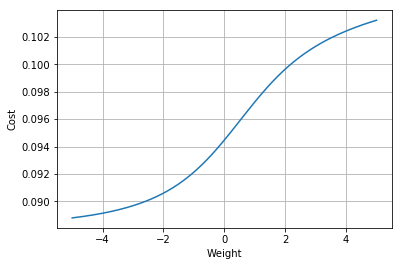

In [21]:
plot(weightsToTry, costs)
grid(1)
ylabel('Cost')
xlabel('Weight')

Let's pretend for a second that we only have 1 weight, instead of 9. To find the ideal value of our weight that will minimize our cost, we need to try a bunch of values for W, let's say we test 1,000,000 values.

In [22]:
weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000, 1000))

startTime = time.clock()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i, j] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

In [23]:
timeElapsed = endTime-startTime
timeElapsed

27.108865830716447

It takes about 25 seconds to check 1,000,000 different weight values for our neural network. Therefore, Forward Propagation may not be the most efficient approach to minimize the cost (J).

$$z^{(2)} = XW^{(1)}$$

$$a^{(2)} = f(z^{(2)})$$

$$z^{(3)} = a^{(2)}W^{(2)}$$

$$\hat{y} = f(z^{(3)})$$

$$J = \sum \frac{1}{2}(y-\hat{y})^2$$

We have 5 equations, but we can really think of them as one big equation that uniquely determines our cost, J, from X, y, W1, and W2.

We want to know "which way is downhill", that is, what is the rate of change of J with respect to W, also known as the derivative. And in this case, since we’re just considering one weight at a time, the partial derivative.

We can derive an expression for dJdW, that will give us the rate of change of J with respect to W, for any value of W! If dJdW is positive, then the cost function is going uphill. If dJdW is negative the cost function is going downhill.

$$\frac{\partial J}{\partial W^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}$$

We can move our sigma outside and just worry about the derivative of the inside expression first.

$$\frac{\partial J}{\partial W^{(2)}} = \sum \frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}$$

To keep things simple, we’ll temporarily forget about our summation. Once we’ve computed dJdW for a single example, we’ll add all our individual derivative terms together.

$$\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}}$$

Apply the chain rule.

$$\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y})\frac{\partial \hat{y}}{\partial z^{(3)}}\frac{\partial z^{(3)}}{\partial W^{(2)}}$$

To find the rate of change of yHat with respect to z3, we need to differentiate our sigmoid activation function with respect to z.

$$f(z) = \frac{1}{1+e^{-z}}$$

$$f^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2}$$

Now is a good time to add a new python method for the derivative of our sigmoid function, sigmoid Prime. Our derivative should be the largest where our sigmoid function is the steepest, at the value z equals zero.

In [24]:
def sigmoid(z):
    return 1/(1+np.exp(-z)) #Apply sigmoid activation function

In [25]:
def sigmoidPrime(z):
    return np.exp(-z)/((1+np.exp(-z))**2) #Derivative of sigmoid function

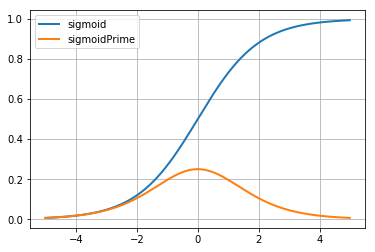

In [26]:
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues), linewidth=2)
plot(testValues, sigmoidPrime(testValues), linewidth=2)
grid(1)
legend(['sigmoid', 'sigmoidPrime'])

Recall the equation:

$$\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y})\frac{\partial \hat{y}}{\partial z^{(3)}}\frac{\partial z^{(3)}}{\partial W^{(2)}}$$

We can now replace dyHat/dz3 with f prime of z 3.

$$\frac{\partial J}{\partial W^{(2)}}= -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(2)}}$$

Recall the equation:

$$z^{(3)} = a^{(2)}W^{(2)}$$

Assign a new variable delta 3:

$$\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)})$$

Then, a new equation is formed:

$$\frac{\partial J}{\partial W^{(2)}} = (a^{(2)})^T\delta^{(3)}$$

We’ll code up our gradients in python in a new method, cost function prime. Numpy’s multiply method performs element-wise multiplication, and the dot method performs matrix multiplication.

In [27]:
def costFunctionPrime(self, X, y):
    self.yHat = self.forward(X) #Compute derivative with respect to W and W2 for a given X and y:

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)

We have one final term to compute: dJ/dW1. The derivation begins the same way:

$$\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})\frac{\partial \hat{y}}{\partial W^{(1)}}$$

$$\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})\frac{\partial \hat{y}}{\partial z^{(3)}}\frac{\partial z^{(3)}}{\partial W^{(1)}}$$

$$\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}}$$

Apply chain rule:

$$\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

then:

$$\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

There’s still a nice linear relationship along each synapse, but now we’re interested in the rate of change of z(3) with respect to a(2). Now the slope is just equal to the weight value for that synapse. We can achieve this mathematically by multiplying by W(2) transpose.

Recall the equations:

$$z^{(3)} = a^{(2)}W^{(2)}$$

$$\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)})$$

Therefore:

$$\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

$$\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

$$\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)}(W^{(2)})^{T}\frac{\partial a^{(2)}}{\partial W^{(1)}}$$

Apply chain rule:

$$\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} (W^{(2)})^{T}\frac{\partial a^{(2)}}{\partial z^{(2)}}\frac{\partial z^{(2)}}{\partial W^{(1)}}$$

Our next term to work on is da(2)/dz(2) – this step is just like the derivative across our layer 3 neurons, so we can just multiply by f prime(z2).

$$\frac{\partial a^{(2)}}{\partial z^{(2)}} = f^\prime(z^{(2)})$$

$$\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} (W^{(2)})^{T}f^\prime(z^{(2)})\frac{\partial z^{(2)}}{\partial W^{(1)}}$$

Our final computation here is dz2/dW1. This is very similar to our dz3/dW2 computation, there is a simple linear relationship on the synapses between z2 and w1, in this case though, the slope is the input value, X. We can use the same technique as last time by multiplying by X transpose, effectively applying the derivative and adding our dJ/dW1’s together across all our examples.


$$\frac{\partial J}{\partial W^{(1)}} = X^{T}\delta^{(3)} (W^{(2)})^{T}f^\prime(z^{(2)})$$

$$\delta^{(2)} = \delta^{(3)} (W^{(2)})^{T}f^\prime(z^{(2)})$$

AND

$$\frac{\partial J}{\partial W^{(2)}} = (a^{(2)})^T\delta^{(3)}$$


All that’s left is to code this equation up in python. What’s cool here is that if we want to make a deeper neural network, we could just stack a bunch of these operations together.

In [28]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

So how should we change our W’s to decrease our cost? We can now compute dJ/dW, which tells us which way is uphill in our 9 dimensional optimization space.

In [29]:
NN = Neural_Network()

In [30]:
cost1 = NN.costFunction(X,y)

In [31]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [32]:
dJdW1

array([[ 0.03410303,  0.06353532,  0.00017587],
       [ 0.02830368,  0.04950944,  0.0001567 ]])

In [33]:
dJdW2

array([[-0.11618482],
       [-0.17772342],
       [-0.11808296]])

If we move this way by adding a scalar times our derivative to our weights, our cost will increase, and if we do the opposite, subtract our gradient from our weights, we will move downhill and reduce our cost. This simple step downhill is the core of gradient descent and a key part of how even very sophisticated learning algorithms are trained.

In [34]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [38]:
print cost1, cost2

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-38-41ec7584a56f>, line 1)

In [39]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [40]:
print cost2, cost3

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-40-e181a8a60cdc>, line 1)

Let’s test our method with a simple function, x squared. We’ll choose a reasonable small value for epsilon, and compute the slope of x^2 at a given point by finding the function value just above and just below our test point. We can then compare our result to our symbolic derivative 2x, at the test point. If the numbers match, we’re in business!

In [41]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

We can use the same approach to numerically evaluate the gradient of our neural network. It’s a little more complicated this time, since we have 9 gradient values, and we’re interested in the gradient of our cost function. We’ll make things simpler by testing one gradient at a time. We’ll “perturb” each weight - adding epsilon to the current value and computing the cost function, subtracting epsilon from the current value and computing the cost function, and then computing the slope between these two values.

In [42]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad

We’ll repeat this process across all our weights, and when we’re done we’ll have a numerical gradient vector, with the same number of values as we have weights. It’s this vector we would like to compare to our official gradient calculation. We see that our vectors appear very similar, which is a good sign, but we need to quantify just how similar they are.

In [43]:
NN = Neural_Network()

In [44]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

array([ 0.03085487, -0.0130074 , -0.0189822 ,  0.02364601, -0.00974382,
       -0.01382149, -0.09345743, -0.11902374, -0.10223523])

In [45]:
grad = NN.computeGradients(X,y)
grad

array([ 0.03085487, -0.0130074 , -0.0189822 ,  0.02364601, -0.00974382,
       -0.01382149, -0.09345743, -0.11902374, -0.10223523])

A nice way to do this is to divide the norm of the difference by the norm of the sum of the vectors we would like to compare. Typical results should be on the order of 10^-8 or less if you’ve computed your gradient correctly.

In [46]:
norm(grad-numgrad)/norm(grad+numgrad)

9.135221381399307e-11

And that’s it, we can now check our computations and eliminate gradient errors before they become a problem.

Here, we’re going to use a more sophisticated variant on gradient descent, the popular Broyden-Fletcher-Goldfarb-Shanno numerical optimization algorithm. The BFGS algorithm overcomes some of the limitations of plain gradient descent by estimating the second derivative, or curvature, of the cost function surface, and using this information to make more informed movements downhill. BFGS will allow us to find solutions more often and more quickly.

We’ll use the BFGS implementation built into the scipy optimize package, specifically within the minimize function. To use BFGS, the minimize function requires us to pass in an objective function that accepts a vector of parameters, input data, and output data, and returns both the cost and gradients. Our neural network implementation doesn’t quite follow these semantics, so we’ll use a wrapper function to give it this behavior. We’ll also pass in initial parameters, set the jacobian parameter to true since we’re computing the gradient within our neural network class, set the method to BFGS, pass in our input and output data, and some options. Finally, we’ll implement a callback function that allows us to track the cost function value as we train the network. Once the network is trained, we’ll replace the original, random parameters, with the trained parameters.

In [47]:
from scipy import optimize

In [48]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

If we plot the cost against the number of iterations through training, we should see a nice, monotonically decreasing function. Further, we see that the number of function evaluations required to find the solution is less than 100, and far less than the 10^27 function evaluation that would have been required to find a solution by brute force, as shown in part 3. Finally, we can evaluate our gradient at our solution and see very small values – which make sense, as our minimum should be quite flat.

In [49]:
NN = Neural_Network()

In [50]:
T = trainer(NN)

In [51]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 66
         Function evaluations: 75
         Gradient evaluations: 75


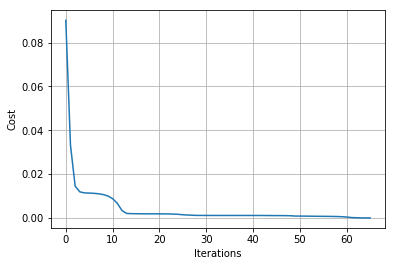

In [52]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [53]:
NN.costFunctionPrime(X,y)

(array([[  1.74498408e-06,  -9.84735746e-07,  -5.77777783e-06],
        [  5.02335948e-07,  -1.65102568e-06,   6.89194773e-07]]),
 array([[  1.32247349e-06],
        [  2.81738761e-06],
        [  2.52582311e-06]]))

The more exciting thing here is that we finally have a trained network that can predict your score on a test based on how many hours you sleep and how many hours you study the night before. If we run our training data through our forward method now, we see that our predictions are excellent. We can go one step further and explore the input space for various combinations of hours sleeping and hours studying, and maybe we can find an optimal combination of the two for your next test.

In [54]:
NN.forward(X)

array([[ 0.74999005],
       [ 0.82012743],
       [ 0.92984687]])

In [55]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [56]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [57]:
allOutputs = NN.forward(allInputs)

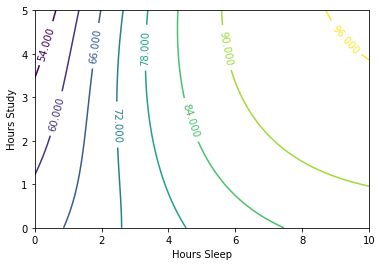

In [58]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

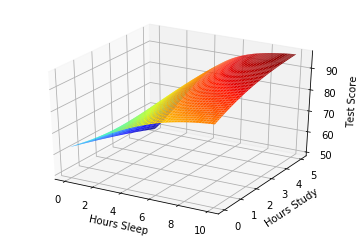

In [59]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')